In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import math
import pandas as pd

In [2]:
img = cv.imread('..//dataset/zoom_needle/b_needle_1.jpg', cv.IMREAD_GRAYSCALE)

In [65]:
img

array([[ 60,  62,  66, ..., 133, 129, 125],
       [ 59,  61,  64, ..., 132, 129, 124],
       [ 59,  60,  63, ..., 132, 128, 123],
       ...,
       [194, 195, 196, ..., 208, 207, 207],
       [194, 195, 196, ..., 208, 207, 206],
       [197, 197, 197, ..., 207, 207, 207]], dtype=uint8)

In [13]:
height, weight = img.shape[:]

In [18]:
i_min, i_max = cv.minMaxLoc(img)[:2]

In [21]:
img.shape[:]

(249, 246)

In [22]:
from PIL import Image
# изображение перевернуто на 270 градусов, так же является чб
i = Image.open("..//dataset/zoom_needle/b_needle_1.jpg")

In [23]:
n = np.array(i) # массив интенсивности пикселей

In [25]:
n.size

183762

In [28]:
# im = Image.open("output.png")
rgb_im = i.convert('RGB')
color = rgb_im.getcolors()
# print('Цвета', color)
path = (197, 0, 0)
border = (0, 50, 0)


for x in range(i.size[1]):
    for y in range(i.size[0]):
        pix = rgb_im.getpixel((y, x))
        if pix == path:
            print(f"Цвет: {path}, координаты: {y},{x}!")


In [50]:
a = [[21, 2],[2,3]]

3

In [59]:
len(np.array(a))

2

In [52]:
arr_one_line = np.reshape(a, (1,-1))[0]
h_p = np.max(abs(arr_one_line-2))      

In [64]:
sum((arr_one_line))

28

In [ ]:
# Даня передает массив линий, пиксель и двумерный или тремерный массив

In [46]:
# ищем h_p
def h_p(array: np.ndarray, picxel: int, eps: int = 10, array_line)-> int:
    arr_one_line = np.reshape(array, (1,-1))[0]
    h_p = np.max(abs(arr_one_line-picxel))      
    if h_p <= eps:
        h_p = 0
    return h_p

In [ ]:
def h_c(array_line):
    s = len(array_line)
    h_c = (1/l_c())*sum(np.array([h_p]))

In [ ]:
def l_c():
    

In [ ]:
class Pixel:
    def __init__(self, position: np.ndarray, intensity: int):
        self.position = np.array(position)
        self.intensity = intensity
        self.h_p = 0
        self.district_intensities = np.array([])

    def set_district_intensitys(self, neighbourhood_intensity: np.ndarray):
        self.district_intensities = np.array(neighbourhood_intensity).reshape(1, -1)

In [38]:
def filter_prewitt(img):
    """
    Функция реализует работу оператора Приютти и возвращает изображение с выделенными границами иглы
    
    img - исходное изображение;
    """
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    x = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
    y = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    
    img_prewitt_x = cv.filter2D(img_gray, -1, x)
    img_prewitt_y = cv.filter2D(img_gray, -1, y)
    
    img_prewitt = img_prewitt_x + img_prewitt_y
    
    ret, thresh = cv.threshold(img_prewitt, 150, 255, cv.THRESH_BINARY)
    contours, hierarchy = cv.findContours(image=thresh, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)
    
    return contours

In [3]:
def draw_borders(img):
    """
    Функция для отрисовки исходной картинки и границ иглы при помощи фильтра Кэнни
    
    img - исходная картинка
    """
    img_filter = filter_prewitt(img)
    plt.figure(figsize=(13, 13))
    plt.subplot(121), plt.imshow(img, cmap='gray')
    plt.title('Черно-белая картинка')
    plt.subplot(122), plt.imshow(img_filter, cmap='gray')
    plt.title('Границы алмазной иглы')
    plt.show()

### Пример 1

Алмазная игла, где кончик иглы четко разлечим
<img src="../dataset/zoom_needle/b_needle_1.jpg" alt="Игла с хорошо выделенными границами без помех" width="200"/>

In [4]:
img_1 = cv.imread('..//dataset/zoom_needle/b_needle_1.jpg', cv.IMREAD_GRAYSCALE)

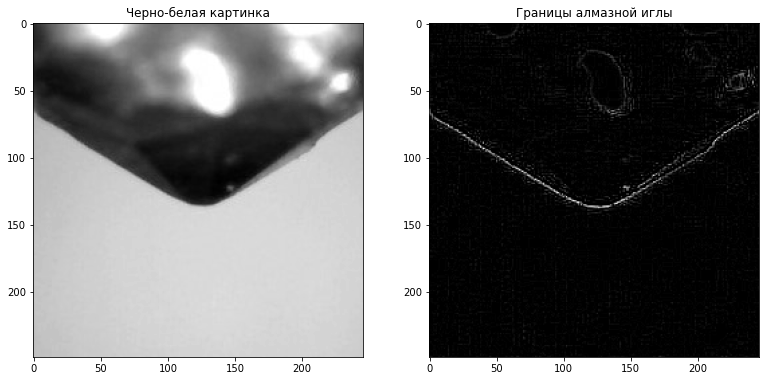

In [5]:
draw_borders(img_1)

In [36]:
def draw_borders(img, conture_canny):
    """
    Функция для отрисовки границ, которые выделил метод
    и отрисовки границ, которые были найдены при помощи функции max_points()

    img - исходная картинка;
    conture_canny - границы (контуры), полученные при помощи метода Кенни;
    """
    plt.figure(figsize=(13, 13))
    
    image_copy_1 = img.copy()
    canny = cv.drawContours(image=image_copy_1, contours=conture_canny, contourIdx=-1, color=(0,255, 0), thickness=2,lineType=cv.LINE_AA)
    plt.subplot(121), plt.imshow(canny)
    plt.title('Границы выделенные методом Частных производных')

#     image_copy_2 = img.copy()
#     max_len = cv.drawContours(image=image_copy_2, contours=np.array([conture_max_point]), contourIdx=-1, color=(0, 255, 0), thickness=2,
#                               lineType=cv.LINE_AA)
#     plt.subplot(122), plt.imshow(max_len)
#     plt.title('Отфильтрованные границы иглы')

    plt.show()

In [10]:
list_img = pd.DataFrame(pd.read_csv(
    '..\dataset\zoom_needle_no_background.csv', sep=";"))
list_path_img = list_img["path"]
list_img

,id,sharpening,path
0,1,blunt,zoom_needle_no_background/b_needle_1.jpg
1,2,blunt,zoom_needle_no_background/b_needle_2.jpg
2,3,blunt,zoom_needle_no_background/b_needle_3.jpg
3,4,blunt,zoom_needle_no_background/b_needle_4.jpg
4,5,blunt,zoom_needle_no_background/b_needle_5.jpg
5,6,blunt,zoom_needle_no_background/b_needle_6.jpg
6,7,blunt,zoom_needle_no_background/b_needle_7.jpg
7,8,sharp,zoom_needle_no_background/s_needle_1.jpg
8,9,sharp,zoom_needle_no_background/s_needle_2.jpg
9,10,sharp,zoom_needle_no_background/s_needle_3.jpg


../dataset/zoom_needle_no_background/b_needle_1.jpg


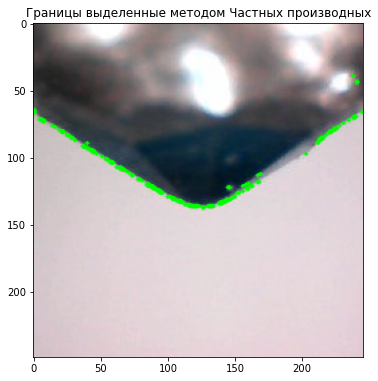

../dataset/zoom_needle_no_background/b_needle_2.jpg


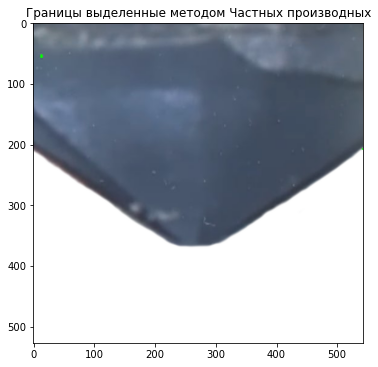

../dataset/zoom_needle_no_background/b_needle_3.jpg


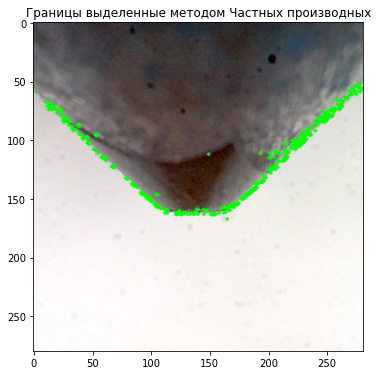

../dataset/zoom_needle_no_background/b_needle_4.jpg


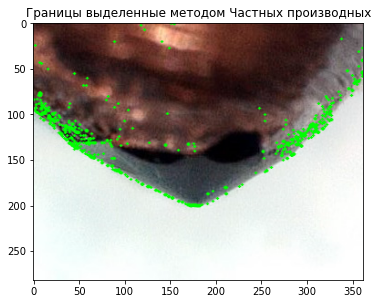

../dataset/zoom_needle_no_background/b_needle_5.jpg


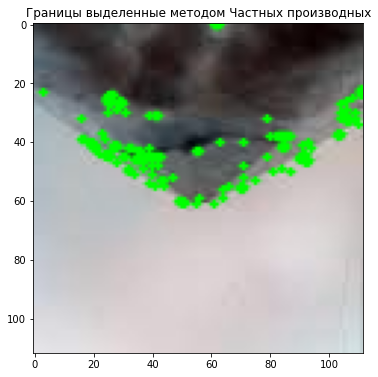

../dataset/zoom_needle_no_background/b_needle_6.jpg


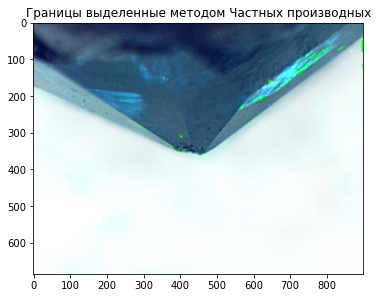

../dataset/zoom_needle_no_background/b_needle_7.jpg


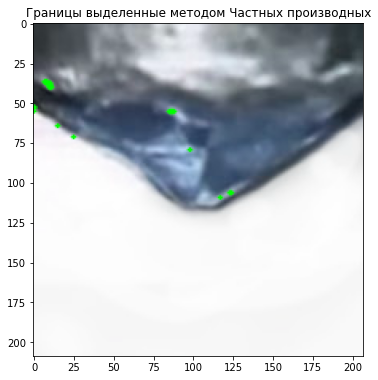

../dataset/zoom_needle_no_background/s_needle_1.jpg


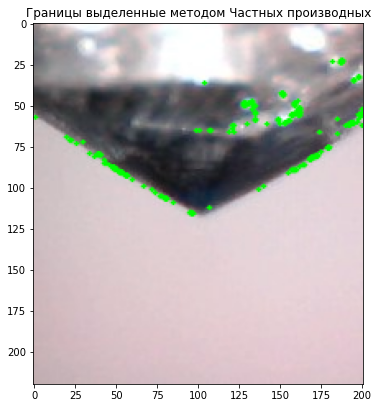

../dataset/zoom_needle_no_background/s_needle_2.jpg


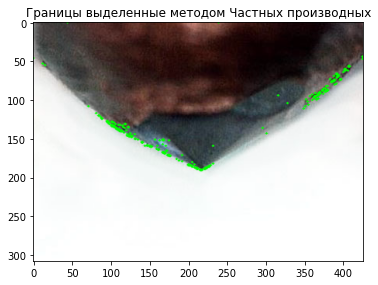

../dataset/zoom_needle_no_background/s_needle_3.jpg


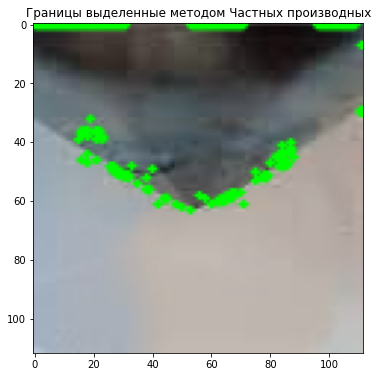

../dataset/zoom_needle_no_background/s_needle_4.jpg


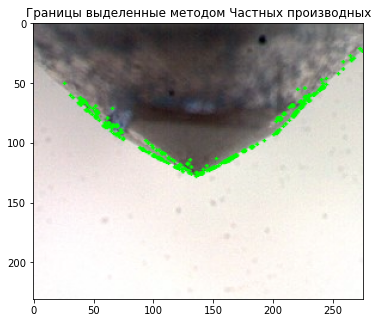

../dataset/zoom_needle_no_background/s_needle_5.jpg


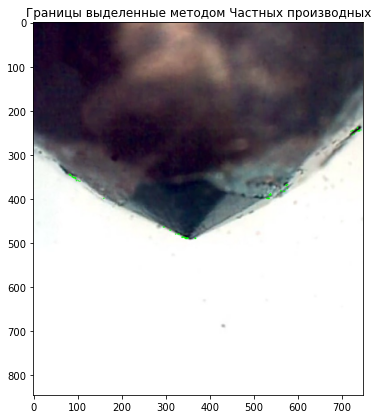

In [39]:
for path_img in list_path_img:
    path = '../dataset/'+ path_img
    print(path)
    img = cv.imread(path, 1)
    contour = filter_prewitt(img)
    draw_borders(img, contour)

#### Повышение контрастности ЧБ изображения
Попробуем улучшить результат работы фильтра, изменяя контрастность черно-белой картинки

In [47]:
def calc_gray_hist(img):
    """
    Функция для расчёта гистограммы распределения серого на картинке
    
    img - исходная картинка
    """
    height, weight = img.shape[:2]
    grayHist = np.zeros([256], np.uint64)
    for i in range(height):
        for j in range(weight):
            grayHist[img[i][j]] += 1
    return grayHist

In [48]:
def gray_hist(img):
    """
    Функция для отрисовки гистограммы распределения серого на картинке
    
    img - исходная картинка
    """
    height, weight = img.shape[:2]
    pixelSequence = img.reshape([height * weight, ])
    numberBins = 256
    histogram, bins, patch = plt.hist(pixelSequence, numberBins,
                                      facecolor='black', histtype='bar')
    plt.xlabel("gray label")
    plt.ylabel("number of pixels")
    plt.axis([0, 255, 0, np.max(histogram)])
    plt.show()

**1. Cпособ улучшения картинки**

***Нормализация гистограммы***

которая представляет собой метод линейного преобразования, который автоматически выбирает значения a и b, где

$a = \frac{O_{max}-O_{min}}{I_{max}-I_{min}},b=O_{min}-\frac{O_{max}-O_{min}}{I_{max}-I_{min}}*I_{min}$,

где 
- $O_{max},O_{min}$ - минимальный уровень серого и максимальный уровень серого, отображаемые в исходном изображении
- $I_{max},I_{min}$- минимальный уровень серого и максимальный уровень серого, заданный самостоятельно

*Замечание:*

Если $a > 1$, коэффициент контрастности выходного изображения увеличивается, если $0 < a < 1$, коэффициент контрастности уменьшается маленький. 

Изменение значения $b$ влияет на яркость выходного изображения. При $b > 0$ яркость увеличивается, а при $b < 0$ яркость уменьшается.

In [49]:
def normaliz_hist(img):
    """
    Функция для нормализации гистограммы распределения серого на картинке
    
    img - исходная картинка
    """
    i_min, i_max = cv.minMaxLoc(img)[:2]
    o_min, o_max = 0, 255
    
     # Рассчитать значения a и b
    a = float(o_max - o_min) / (i_max - i_min)
    b = o_min - a * i_min
    
    out = a * img + b
    out = out.astype(np.uint8)
    return out

**2. Cпособ улучшения картинки**

***Глобальное выравнивание гистограммы***

Реализация выравнивания гистограммы в основном делится на четыре этапа:
1. Рассчитайте гистограмму градаций серого изображения
2. Рассчитать кумулятивную гистограмму серой гистограммы
3. Соотношение между уровнем серого на входе и уровнем серого на выходе
4. Циклически выводить уровень серого каждого пикселя изображения в соответствии с соотношением отображения

Соотношение сопоставления:

$q=\frac{\sum_{k=0}^{p}hist_{I}(k)}{H*W}*256-1$

Где q - выходной пиксель, а p - входной пиксель. 

Можно так понять, $\frac{\sum_{k=0}^{p}hist_{I}(k)}{H*W}$

Этот термин эквивалентен гистограмме совокупной вероятности гистограммы градаций серого (в диапазоне от 0 до 1), а затем увеличивает диапазон до 0–255, чтобы получить пиксели выходного изображения.

In [50]:
def equal_hist(img):
    return cv.equalizeHist(img)

**3. Cпособ улучшения картинки**

***Адаптивная коррекция гистограммы с ограниченным контрастом***

Адаптивное выравнивание гистограммы сначала делит изображение на непересекающиеся региональные блоки, а затем выполняет выравнивание гистограммы для каждого блока отдельно. Очевидно, что при отсутствии шума гистограмма в градациях серого для каждой небольшой области будет ограничена небольшим диапазоном градаций серого, но при наличии шума после выполнения выравнивания гистограммы для каждого блока разделенной области, Шум будет усиливаться. 

Во избежание появления шума предлагается «Ограничение контраста» (Contrast Limiting). Если интервал гистограммы заранее превышает предварительно установленный «предел контраста», он будет обрезан, а затем обрезанная часть будет равномерно распределена между другими Бин, тем самым восстанавливая гистограмму. Далее вводится функция выравнивания адаптивной гистограммы для ограничения контраста, реализованная OpenCV,

In [51]:
def additive_correct(img):
    new_img = cv.resize(img, None, fx=0.5, fy=0.5)
     # Создать объект CLAHE
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    
     # Адаптивное пороговое выравнивание для ограничения контраста
    dst = clahe.apply(new_img)
    return dst

**1. Нормализация гистограммы серого**

*Пример 1*

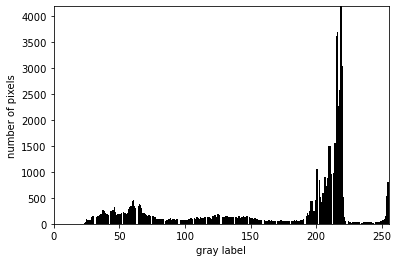

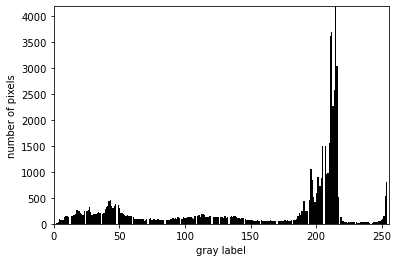

In [55]:
img_1_normaliz = normaliz_hist(img_1)
gray_hist(img_1)
gray_hist(img_1_normaliz)

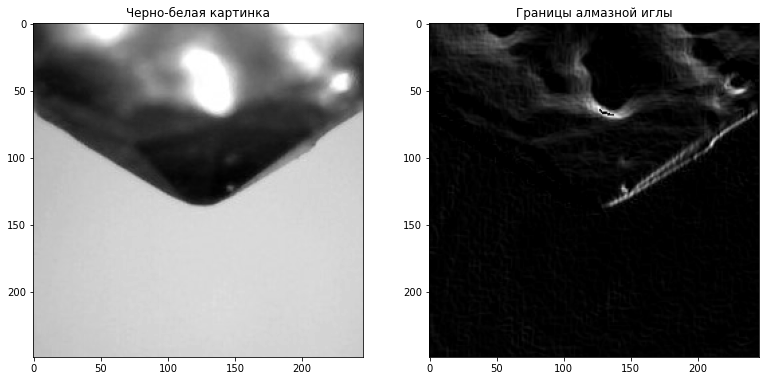

In [56]:
draw_borders(img_1_normaliz)

**2. Глобальное выравнивание гистограммы**

*Пример 1*

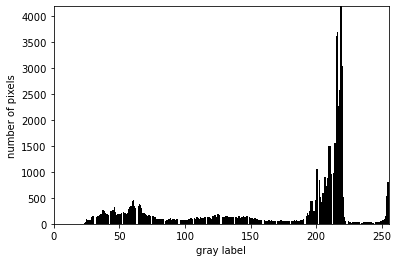

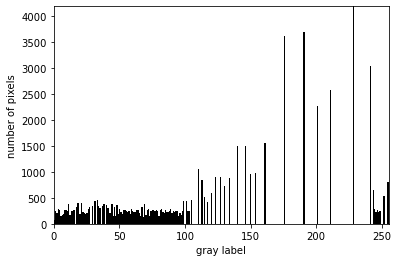

In [58]:
img_1_equal = equal_hist(img_1)
gray_hist(img_1)
gray_hist(img_1_equal)

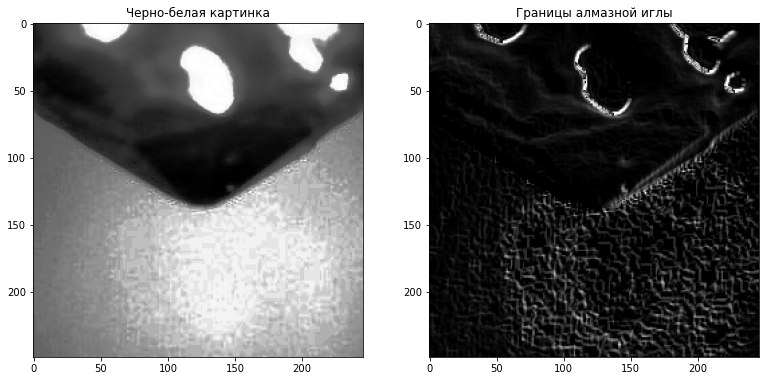

In [59]:
draw_borders(img_1_equal)

**3. Cпособ улучшения картинки**

*Пример 1*

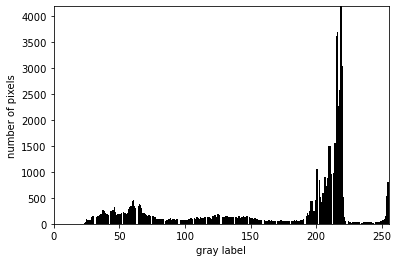

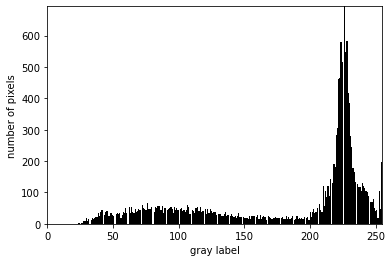

In [60]:
img_1_dst = additive_correct(img_1)
gray_hist(img_1)
gray_hist(img_1_dst) 

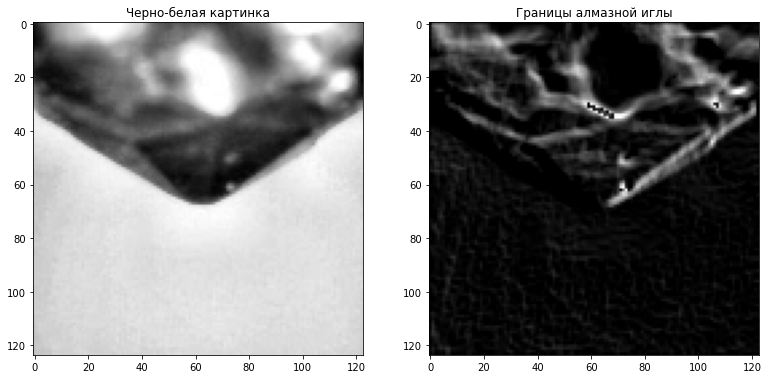

In [61]:
draw_borders(img_1_dst)

### Пример 2

На фоне имеются другие объекты, цвет кончика иглы и фон находятся в одной цветовой гамме

<img src="../dataset/zoom_needle/b_needle_2.jpg" alt="затупленная игла с невыраженными границами" width="200"/>

In [62]:
img_2 = cv.imread('..//dataset/zoom_needle/b_needle_2.jpg', cv.IMREAD_GRAYSCALE)

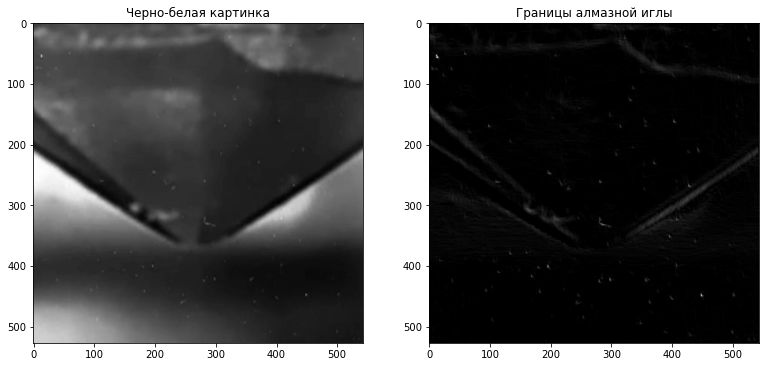

In [63]:
draw_borders(img_2)

**1. Нормализация гистограммы серого**

*Пример 2*

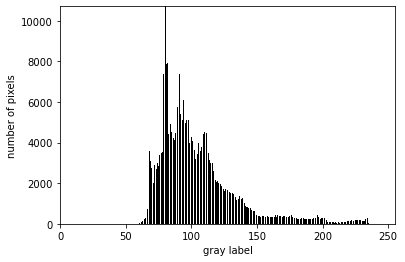

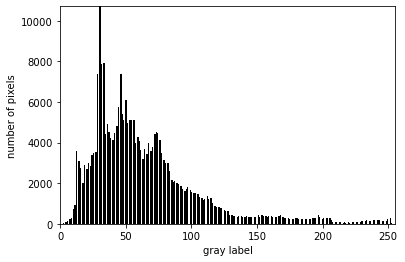

In [73]:
img_2_normaliz = normaliz_hist(img_2)
gray_hist(img_2)
gray_hist(img_2_normaliz)

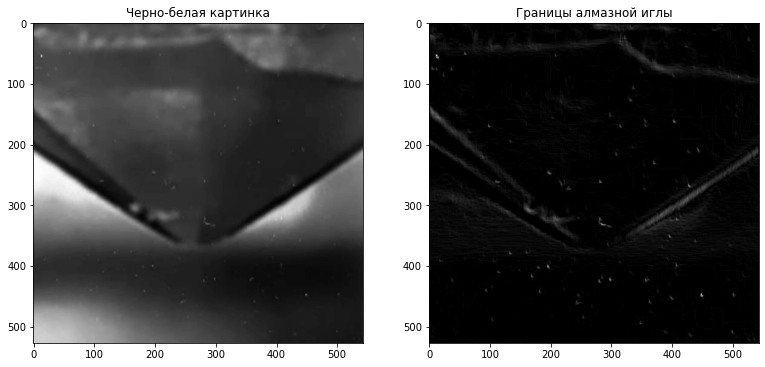

In [74]:
draw_borders(img_2_normaliz)

**2. Глобальное выравнивание гистограммы**

*Пример 2*

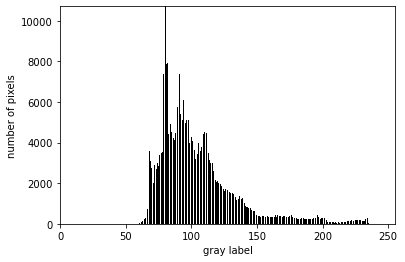

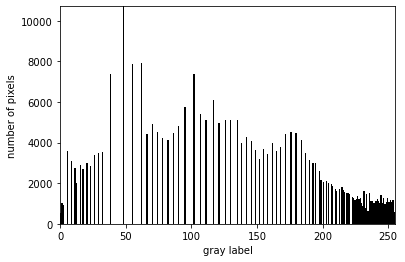

In [75]:
img_2_equal = equal_hist(img_2)
gray_hist(img_2)
gray_hist(img_2_equal)

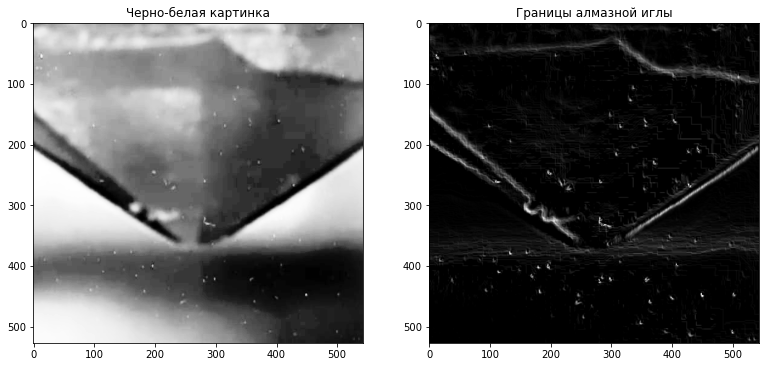

In [76]:
draw_borders(img_2_equal)

**3. Cпособ улучшения картинки**

*Пример 2*

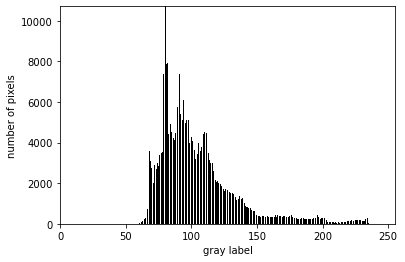

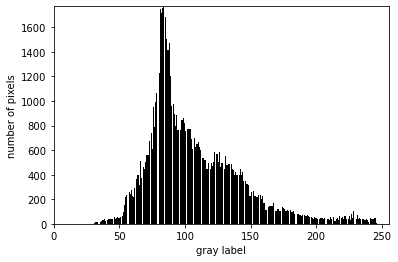

In [77]:
img_2_dst = additive_correct(img_2)
gray_hist(img_2)
gray_hist(img_2_dst)

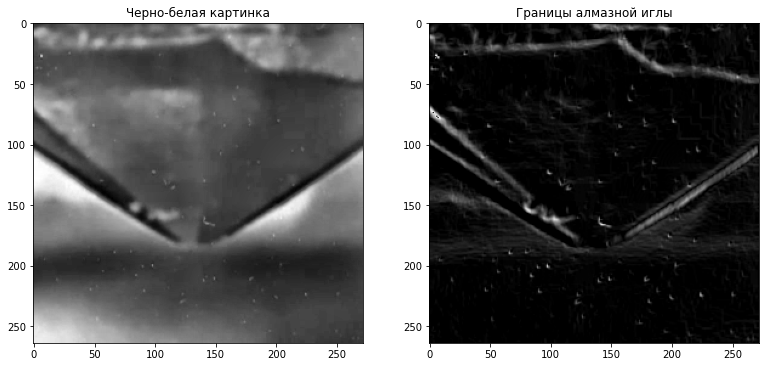

In [78]:
draw_borders(img_2_dst)

**Вывод:** как видно из приведенных примеров и попыток улучшения картинки не вышло ничего хорошего. На картинке, где границы были четко выделены оператор Приютт определяет только одну из линий. На картинке, которая была с помехами виднеются некоторые улучшения в работе оператора, но границы определяются не четко и не верно. 

Данный оператор не подходит для дальнейших исследований.